#  <font color='blue'> *LEAD SCORING CASE STUDY*</font>

### <font color='red'> Problem Statement </font>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

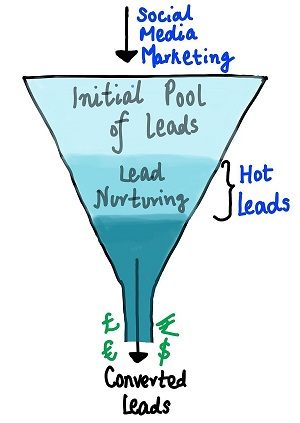

                                     Lead Conversion Process - Demonstrated as a funnel

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



### <font color='red'> Business Goal </font>

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### <font color='red'> Exploratory Data Analysis </font>

#### <font color='blue'> Importing Required Libraries </font>

In [1]:
# Import the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [3]:
# Supress the unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

#### <font color='blue'> Reading the CSV Data File </font>

In [4]:
# Reading the data csv file

Leads = pd.read_csv('Leads.csv')

In [5]:
# See the shape of the data file

Leads.shape

(9240, 37)

The data consists of 9240 rows & 37 columns. Let's have a look at the column headings

In [6]:
Leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [7]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### <font color='blue'> Dropping / Imputing the Missing Values </font>

In [9]:
# Check for any missing values 

round((Leads.isnull().sum()/len(Leads.index))*100, 2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

As we can see above, 6 columns have more than 30% of missing values in their data. Let's drop these columns from the data.

In [10]:
# Removing the variables that have more than 30% null values

for x in Leads.columns:
    if round((Leads[x].isnull().sum()/Leads.shape[0])*100,2)>30:
        Leads.pop(x)

In [11]:
# See the shape of the data file again

Leads.shape

(9240, 31)

In [12]:
# We still have 11 more columns to deal with the null values.

round((Leads.isnull().sum()/len(Leads.index))*100, 2).sort_values(ascending = False).head(11)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

The variable 'City' won't be of any use in our analysis as it is an online educational company. So it's best that we drop it.

In [13]:
# drop the column City

Leads.drop('City', axis=1, inplace=True)

In [14]:
# Get the value counts of the balance columns

Null_Var = ['What matters most to you in choosing a course', 'Lead Profile', 'Country','What is your current occupation', 'How did you hear about X Education', 'Specialization', 'Page Views Per Visit', 'TotalVisits', 'Last Activity', 'Lead Source']
for col in Null_Var:
    print(Leads[col].value_counts())

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asi

There are a few columns in which there is a value called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence should be treated as null values & shall be dropped accordingly. 

The columns 'Lead Profile' and 'How did you hear about X Education' have a lot of Select values which is of no use to the analysis so it's best that we drop them.

In [15]:
# drop the column Lead Profile

Leads.drop('Lead Profile', axis=1, inplace=True)

In [16]:
# drop the column How did you hear about X Education

Leads.drop('How did you hear about X Education', axis=1, inplace=True)

In [17]:
# Let's fill the null values of object type variables with their nmode

Col_To_Fill = ['What matters most to you in choosing a course', 'What is your current occupation', 'Country', 'Last Activity', 'Lead Source']
for i in Col_To_Fill:
    Leads[i].fillna(Leads[i].mode()[0], inplace = True)

There can also be the cases that lead has not entered any specialization if they may not have any specialization or is a student. Hence we can make a category "Others" for the missing values. 

In [18]:
Leads['Specialization'] = Leads['Specialization'].replace('Select', 'Others')

In [19]:
Leads['Specialization'] = Leads['Specialization'].replace('np.nan', 'Others')

In [20]:
# Now, let's check the missing values again

round((Leads.isnull().sum()/len(Leads.index))*100, 2).sort_values(ascending = False)

Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Prospect ID                                       0.00
Magazine                                          0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Lead Number                                       0.00
What is yo

Now, since the % of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [21]:
# Drop the null value rows in the column 'TotalVisits'

Leads = Leads[~pd.isnull(Leads['TotalVisits'])]

In [22]:
# Drop the null value rows in the column 'Page Views Per Visit'

Leads = Leads[~pd.isnull(Leads['Page Views Per Visit'])]

In [23]:
# Check the number of null values again

Leads.isnull().sum().sort_values(ascending=False)

Specialization                                   1431
Prospect ID                                         0
Search                                              0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
What matters most to you in choosing a course       0
Lead Number                                         0
What is your current occupation                     0
Country                                             0
Last Activity               

In [24]:
# See the shape of the final dataset

Leads.shape

(9103, 28)

#### <font color='blue'> Deleting the Unwanted Columns </font>

The variables `Prospect ID` and `Lead Number` don't have any use in the analysis, so it's best to drop these two variables.

In [25]:
Leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [26]:
# Get the value counts of the balance columns

for col in Leads.columns:
    print(Leads[col].astype('category').value_counts())

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64
Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
No     8379
Yes     724
Name: Do Not Email, dtype: int64
No     9101
Yes       2
Name: Do Not Call, dtype: int64
0    5642
1    3461
Name: Converted, dtype: int64
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7

When we look at the value counts of all the columns, there are some columns in which only one value was majorly present among all the data points. However, let's keep these columns & wait until the Feature Elimination process. 

In [27]:
# See the dataset again & inspect the columns

Leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened


In [28]:
Leads.shape

(9103, 26)

#### <font color='blue'> Outlier Analysis </font>

In [29]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

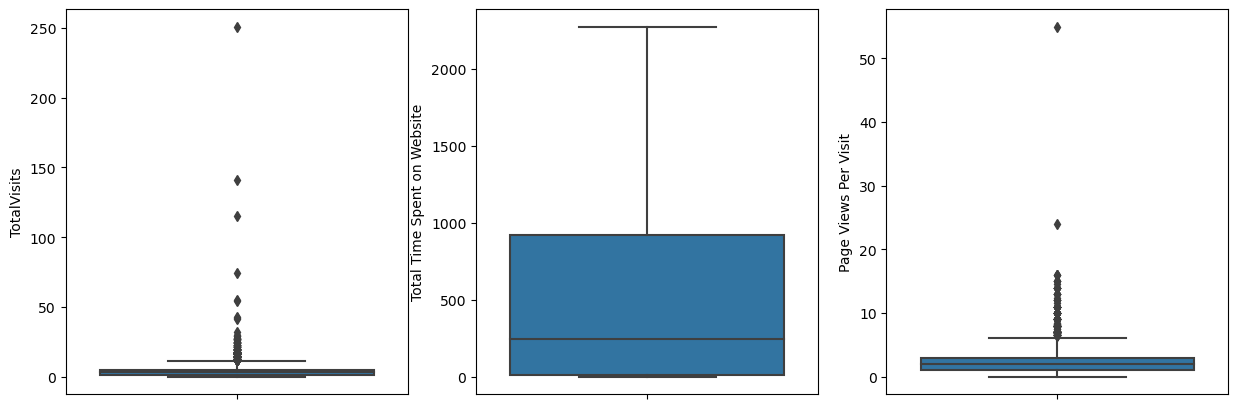

In [30]:
# Plot the numerical columns using boxplots to observe the presence of outliers

Columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(15,5))

i = 1
for col in Columns:
    plt.subplot(1,3,i)
    sns.boxplot(y=col, data=Leads)
    i=i+1

Let's remove the ouliers present & see the plots again. 

In [31]:
# outliers in TotalVisits

Leads = Leads.drop(index = Leads[(Leads['TotalVisits'] > 15)].index)

# outliers in Page Views Per Visit

Leads = Leads.drop(index = Leads[(Leads['Page Views Per Visit'] > 7)].index)

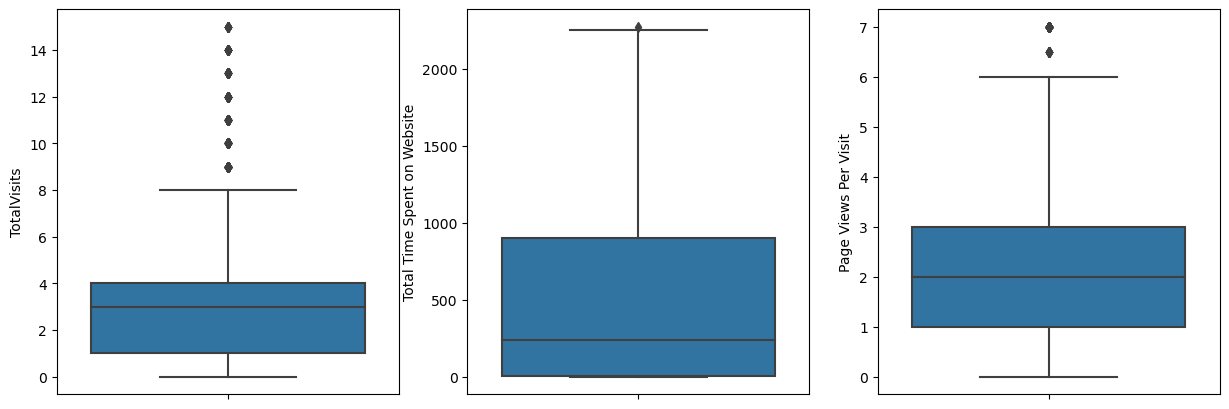

In [32]:
# Plot the boxplots again

Columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(15,5))

i = 1
for col in Columns:
    plt.subplot(1,3,i)
    sns.boxplot(y=col, data=Leads)
    i=i+1

The above boxplots seems to be descent to proceed with. Let's check the shape of the dataset again. 

In [33]:
Leads.shape

(8789, 26)

#### <font color='blue'> Data Visualization & Correlations </font>

As we can see, the column 'Converted' is the Target column here. 

In [34]:
round(Leads['Converted'].value_counts(normalize = True)*100,2)

0    62.05
1    37.95
Name: Converted, dtype: float64

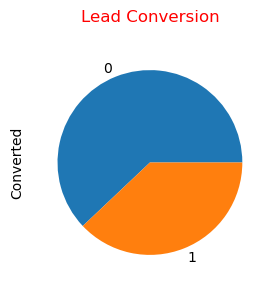

In [35]:
# Plotting the conversion rate

plt.figure(figsize = (4, 3))
Leads['Converted'].value_counts().plot.pie()
plt.title("Lead Conversion\n", fontdict={'fontsize':12, 'color':'red'})
plt.show()

We can see around 38% of conversion rate.

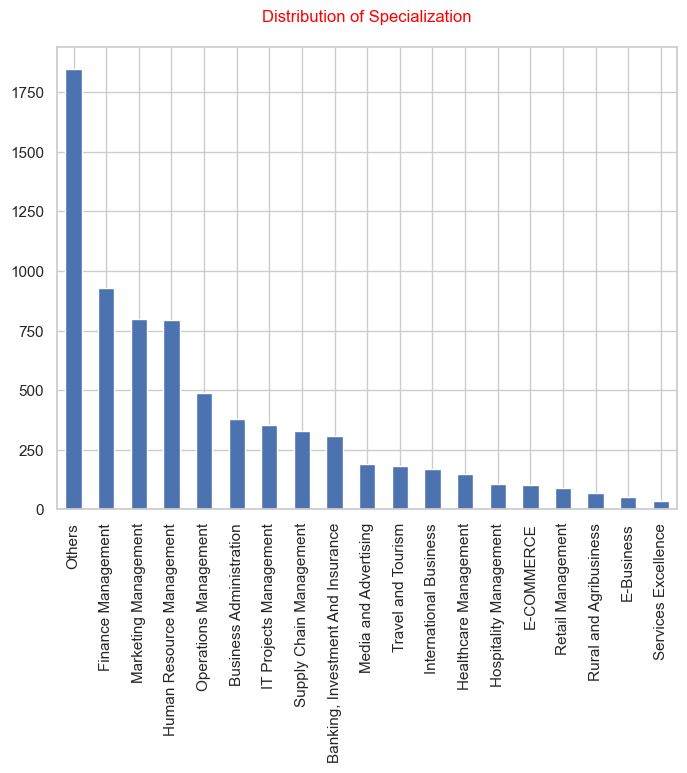

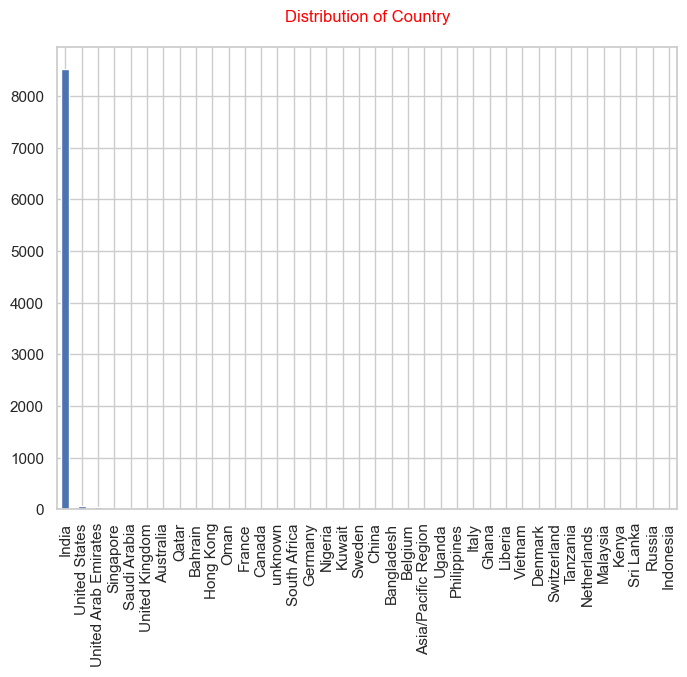

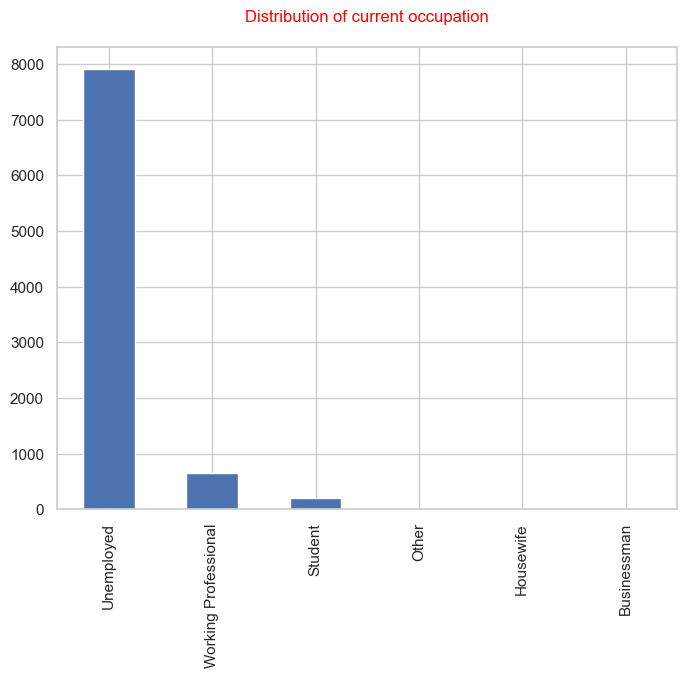

In [36]:
# Plotting Specialization, Country & What is your current occupation

sns.set_theme(style='whitegrid', context='notebook')
plt.figure(figsize = (8, 6))
Leads['Specialization'].value_counts().plot.bar()
plt.title("Distribution of Specialization\n", fontdict={'fontsize':12, 'color':'red'})
plt.show()

sns.set_theme(style='whitegrid', context='notebook')
plt.figure(figsize = (8, 6))
Leads['Country'].value_counts().plot.bar()
plt.title("Distribution of Country\n", fontdict={'fontsize':12, 'color':'red'})
plt.show()

sns.set_theme(style='whitegrid', context='notebook')
plt.figure(figsize = (8, 6))
Leads['What is your current occupation'].value_counts().plot.bar()
plt.title("Distribution of current occupation\n", fontdict={'fontsize':12, 'color':'red'})
plt.show()

Observations from the above plots : 
- Most of the Leads are from India & very few are from other countries.
- Apart from Others, most leads are from Finance, Marketing & HR management specializations.  
- Most of the leads are unemployed. Businessmen & housewives are very less in number. 

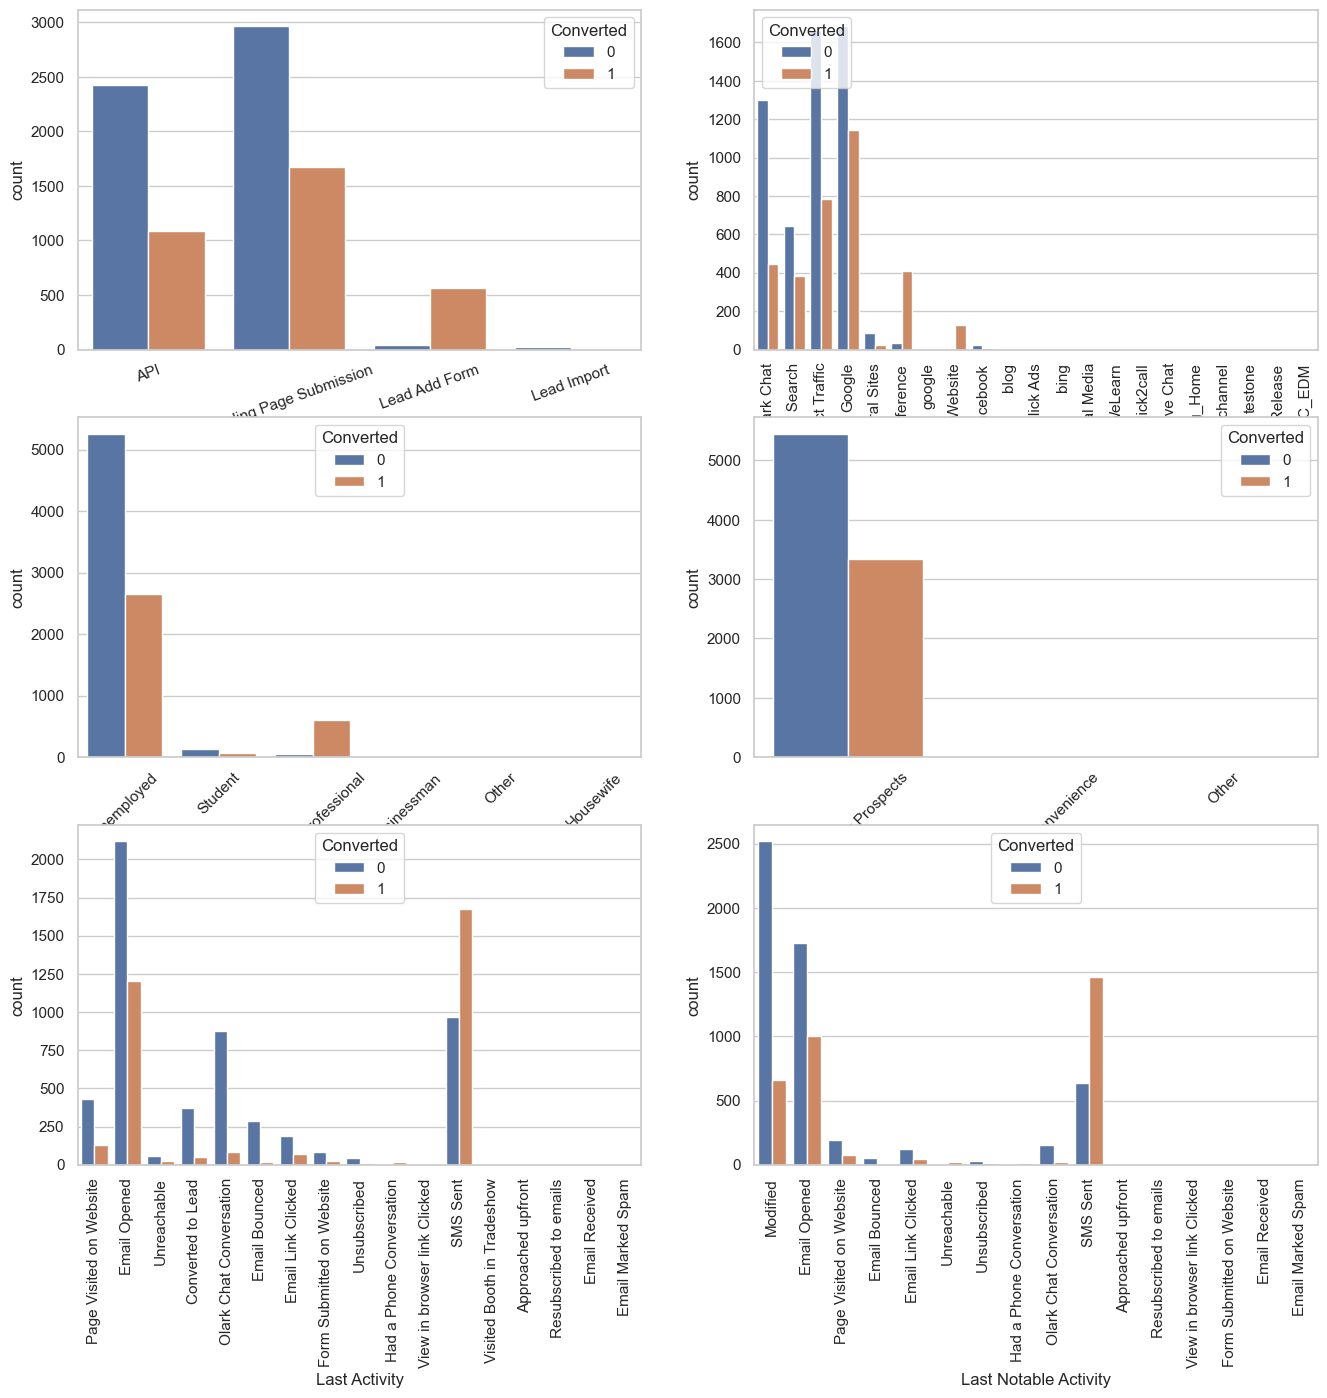

In [37]:
# Plotting countplot for the categorical variables against the Target column

plt.figure(figsize = (16,15))
plt.subplot(3,2,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = Leads)
plt.xticks(rotation = 20)

plt.subplot(3,2,2)
sns.countplot(x = "Lead Source", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)

plt.subplot(3,2,3)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = Leads)
plt.xticks(rotation = 45)

plt.subplot(3,2,4)
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = Leads)
plt.xticks(rotation = 45)

plt.subplot(3,2,5)
sns.countplot(x = "Last Activity", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)

plt.subplot(3,2,6)
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)
plt.show()

Observations from the above plots : 
- Professionals are more likely to convert.
- Those who have the last activity 'SMS Sent' are more likely to convert. 
- Those leads who are originated from 'Lead Add Form' are more likely to convert.
- Those leads with Google as source are more likely to convert. 

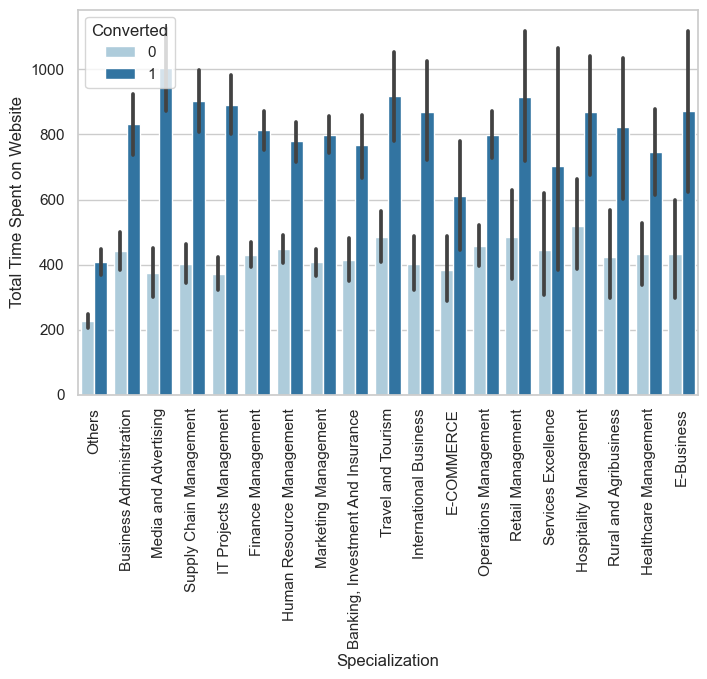

In [38]:
#Let's visualize the correlation of Specialization against conversaion rate

plt.figure(figsize=(8,5))
sns.barplot('Specialization','Total Time Spent on Website',hue='Converted',data=Leads,palette='Paired')
plt.xticks(rotation = 90)
plt.show()

- We can clearly see that the converted leads have spent more time on the website, and highly those who are in Media & advertising field. 

Now, let's visualize the patterns / correlation between the variables using pairplots.

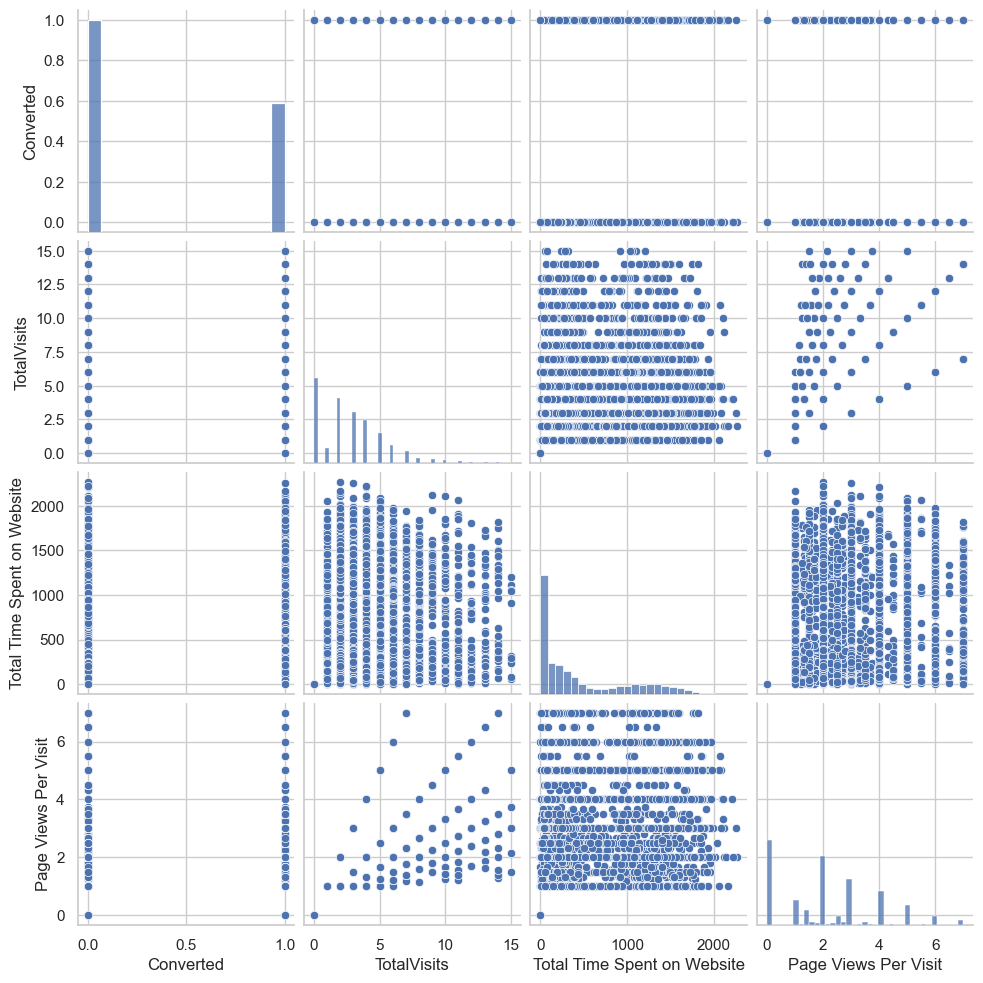

In [39]:
# Plotting pairplots aginst the variables to see the correlation

sns.pairplot(Leads)
plt.show()

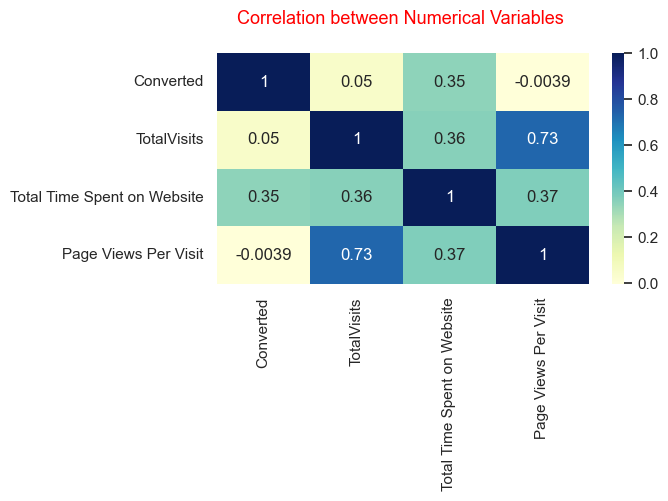

In [40]:
# Plotting heatmap to visualize the correlation of numerical variables

plt.figure(figsize = (6,3))
sns.heatmap(Leads.corr(), cmap = 'YlGnBu', annot = True)
plt.title("Correlation between Numerical Variables \n", fontdict={'fontsize':13, 'color':'red'})
plt.show()

#### <font color='blue'> Creating Dummy Variables for the Categorical Variables </font>

In [41]:
# Get the dummy variables for the categorical features, add the results to the original dataframe & dropping the original columns

df1=pd.DataFrame()
d=pd.DataFrame()
for x in Leads.select_dtypes("object").columns:
    if Leads[x].nunique()>2:
        d[x]=Leads[x]
        df1=pd.get_dummies(d,drop_first=True)
        

df2=pd.DataFrame()
for x in Leads.select_dtypes("object").columns:
    if Leads[x].nunique()==2:
        df2[x]=Leads[x].map({"Yes":1,"No":0}) 

In [42]:
df1=df1.astype("int")

In [43]:
df1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
df3=Leads.select_dtypes(include=["int","float"])

In [45]:
df=pd.DataFrame()
df=pd.concat([df3,df1,df2],axis=1)

In [46]:
# Let's see the shape of our final dataset

df.shape

(8789, 127)

In [47]:
# Let's see the column headings

df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email,Do Not Call,Search,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google',
       ...
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked', 'Do Not Email',
       'Do Not Call', 'Search', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object', length=127)

We have 127 columns present in our final prepared data. 

### <font color='red'> Model Building </font>

#### <font color='blue'> Splitting data into train and test data </font>

In [49]:
# Keep the target variable in y

y = df['Converted']

In [50]:
# Keep all the feature variables in X

X = df.drop('Converted', axis=1)

In [51]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### <font color='blue'> Rescaling the Features using MinMaxScaler </font>

In [52]:
scaler = MinMaxScaler()

In [53]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email,Do Not Call,Search,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
143,0.466667,0.046655,0.500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2881,0.466667,0.197183,0.332857,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3185,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3408,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0.266667,0.606074,0.285714,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [54]:
# See the correlation between the variables

df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email,Do Not Call,Search,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
Converted,1.000000,0.049878,0.348312,-0.003895,-0.041282,0.311917,-0.009582,-0.076124,-0.009582,0.034896,...,0.038660,-0.014476,-0.008342,-0.134054,0.019293,-0.001154,-0.008342,0.003748,0.016294,-0.033868
TotalVisits,0.049878,1.000000,0.359873,0.727408,0.447199,-0.278460,-0.064590,0.133269,-0.061731,0.237851,...,0.012584,0.008319,0.019486,-0.022760,0.008218,0.076454,0.027301,0.002691,0.035071,0.277704
Total Time Spent on Website,0.348312,0.359873,1.000000,0.370145,0.299364,-0.195855,-0.051063,0.147603,-0.049670,0.220859,...,0.008448,0.003141,-0.007560,-0.045618,0.007416,0.010653,0.026274,0.008860,0.010714,0.179817
Page Views Per Visit,-0.003895,0.727408,0.370145,1.000000,0.557803,-0.316746,-0.072408,0.174982,-0.067964,0.280296,...,0.018046,0.022071,0.003024,0.010306,-0.005777,0.029922,0.007034,0.011409,0.000489,0.285622
Lead Origin_Landing Page Submission,-0.041282,0.447199,0.299364,0.557803,1.000000,-0.287653,-0.061862,0.537814,-0.057954,0.080550,...,-0.003248,0.014926,-0.011276,0.093629,-0.015947,0.014151,0.010092,0.014273,0.009501,0.564791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Search,-0.001154,0.076454,0.010653,0.029922,0.014151,-0.009633,-0.002072,0.021090,-0.002072,-0.024389,...,-0.002072,-0.002568,-0.000378,-0.010243,-0.000534,1.000000,-0.000378,-0.000534,0.301014,-0.009644
Newspaper,-0.008342,0.027301,0.026274,0.007034,0.010092,-0.002903,-0.000624,0.017173,-0.000624,-0.007349,...,-0.000624,-0.000774,-0.000114,-0.003087,-0.000161,-0.000378,1.000000,-0.000161,-0.000228,-0.007109
Digital Advertisement,0.003748,0.002691,0.008860,0.011409,0.014273,-0.004106,-0.000883,0.024288,-0.000883,-0.010394,...,-0.000883,-0.001094,-0.000161,-0.004365,-0.000228,-0.000534,-0.000161,1.000000,-0.000322,-0.010054
Through Recommendations,0.016294,0.035071,0.010714,0.000489,0.009501,-0.005807,-0.001249,0.022451,-0.001249,-0.014701,...,-0.001249,-0.001548,-0.000228,-0.006174,-0.000322,0.301014,-0.000228,-0.000322,1.000000,0.008899


#### <font color='blue'> Building our model </font>

There are a lot of variables present in the dataset from which we have to select a small set of features (15 features) using RFE, for automated Feature Selection approach.

In [55]:
# Running RFE with the output number of the features equal to 15

log=LogisticRegression()
rfe1=RFE(log,n_features_to_select=15)
rfe1.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [56]:
# Let's look at the features that have been selected by RFE

list(zip(X_train.columns, rfe1.support_, rfe1.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', False, 44),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 60),
 ('Lead Source_Facebook', False, 55),
 ('Lead Source_Google', False, 91),
 ('Lead Source_Live Chat', False, 84),
 ('Lead Source_NC_EDM', False, 107),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 81),
 ('Lead Source_Pay per Click Ads', False, 79),
 ('Lead Source_Press_Release', False, 101),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', False, 92),
 ('Lead Source_WeLearn', False, 51),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 67),
 ('Lead Source_blog', False, 59),
 ('Lead Source_google', False, 12),
 ('Lead Source_testone', False, 80),
 ('Lead Source_welearnblog_Home', False, 68),

In [57]:
# RFE Feature Ranking

rfe1_ranking = pd.DataFrame({'rank' : rfe1.ranking_, 'support': rfe1.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe1_ranking

,rank,support,features
0,1,True,TotalVisits
37,1,True,Last Activity_SMS Sent
64,1,True,Country_Qatar
97,1,True,What is your current occupation_Housewife
100,1,True,What is your current occupation_Unemployed
...,...,...,...
54,108,False,Country_Indonesia
108,109,False,Last Notable Activity_Email Received
73,110,False,Country_Uganda
123,111,False,Digital Advertisement


In [58]:
# Selected 15 features

col = X_train.columns[rfe1.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Country_Qatar', 'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable', 'Do Not Email'],
      dtype='object')

In [59]:
# Rejected features

X_train.columns[~rfe1.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release',
       ...
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked', 'Do Not Call',
       'Search', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object', length=111)

#### <font color='blue'> Model - 1 </font>

Now, let's create a logistic regression model using statsmodels, for the detailed statistics which is a manual approach.

In [60]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe1 = X_train[col]

In [61]:
# Adding a constant variable 
 
X_train_rfe1_sm = sm.add_constant(X_train_rfe1)

In [62]:
# Creating logistic model 1

lm1 = sm.GLM(y_train,X_train_rfe1_sm,family=sm.families.Binomial()).fit()

In [63]:
#Let's see the summary of our logistic model

print(lm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6152
Model:                            GLM   Df Residuals:                     6136
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.4
Date:                Mon, 16 Dec 2024   Deviance:                       5078.9
Time:                        19:25:06   Pearson chi2:                 6.40e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [64]:
# Now, let's make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,5.61
0,TotalVisits,3.44
1,Total Time Spent on Website,2.28
4,Lead Source_Olark Chat,2.19
2,Lead Origin_Lead Add Form,1.67
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56
7,Last Activity_Olark Chat Conversation,1.43
5,Lead Source_Welingak Website,1.28
14,Do Not Email,1.10


In [65]:
# Dropping 'Country_Qatar' as it is insignificant based on the p values.

X_train_rfe2=X_train_rfe1.drop("Country_Qatar",axis=1)

#### <font color='blue'> Model - 2 </font>

In [66]:
X_train_rfe2_sm = sm.add_constant(X_train_rfe2)
lm2 = sm.GLM(y_train,X_train_rfe2_sm,family=sm.families.Binomial()).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6152
Model:                            GLM   Df Residuals:                     6137
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2542.9
Date:                Mon, 16 Dec 2024   Deviance:                       5085.9
Time:                        19:25:07   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3940
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5214      0.234    -10.777      0.000      -2.980      -2.063
TotalVisits                                              1.4788      0.241      6.132      0.000       1.006       1.951
Total Time Spent on Website                              4.7104      0.171     27.528      0.000       4.375       5.046
Lead Origin_Lead Add Form                                4.7203      0.249     18.921      0.000       4.231       5.209
Lead Origin_Lead Import                                  1.8560      0.503      3.691      0.000       0.871       2.841
Lead Source_Olark Chat                                   1.6127      0.122     13.217      0.000       1.374       1.852
Lead Source_Welingak Website                             1.4774      0.761      1.942      0.052      -0.013       2.968
Last Activity_Had a Phone Conversation                   2.0890      0.828      2.523      0.012       0.466       3.712
Last Activity_Olark Chat Conversation                   -1.5228      0.170     -8.960      0.000      -1.856      -1.190
Last Activity_SMS Sent                                   1.3975      0.076     18.465      0.000       1.249       1.546
What is your current occupation_Housewife               22.8861   1.53e+04      0.001      0.999      -3e+04    3.01e+04
What is your current occupation_Unemployed              -0.4198      0.219     -1.913      0.056      -0.850       0.010
What is your current occupation_Working Professional     2.4807      0.289      8.592      0.000       1.915       3.047
Last Notable Activity_Unreachable                        2.1726      0.514      4.226      0.000       1.165       3.180
Do Not Email                                            -1.4812      0.172     -8.607      0.000      -1.818      -1.144
========================================================================================================================
"""

In [67]:
# Now, let's calculate the VIF values for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,5.60
0,TotalVisits,3.44
1,Total Time Spent on Website,2.28
4,Lead Source_Olark Chat,2.18
2,Lead Origin_Lead Add Form,1.67
8,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
7,Last Activity_Olark Chat Conversation,1.43
5,Lead Source_Welingak Website,1.28
13,Do Not Email,1.10


In [68]:
# Based on the p-values, let's drop the column 'What is your current occupation_Housewife'

X_train_rfe3=X_train_rfe2.drop("What is your current occupation_Housewife",axis=1)

#### <font color='blue'> Model - 3 </font>

In [69]:
X_train_rfe3_sm = sm.add_constant(X_train_rfe3)
lm3 = sm.GLM(y_train,X_train_rfe3_sm,family=sm.families.Binomial()).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6152
Model:                            GLM   Df Residuals:                     6138
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.9
Date:                Mon, 16 Dec 2024   Deviance:                       5095.9
Time:                        19:25:07   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3930
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3894      0.227    -10.543      0.000      -2.834      -1.945
TotalVisits                                              1.4717      0.241      6.108      0.000       0.999       1.944
Total Time Spent on Website                              4.7066      0.171     27.540      0.000       4.372       5.042
Lead Origin_Lead Add Form                                4.7178      0.249     18.927      0.000       4.229       5.206
Lead Origin_Lead Import                                  1.8513      0.503      3.683      0.000       0.866       2.836
Lead Source_Olark Chat                                   1.6048      0.122     13.170      0.000       1.366       1.844
Lead Source_Welingak Website                             1.4763      0.761      1.941      0.052      -0.014       2.967
Last Activity_Had a Phone Conversation                   2.0875      0.828      2.521      0.012       0.465       3.710
Last Activity_Olark Chat Conversation                   -1.5285      0.170     -8.995      0.000      -1.862      -1.195
Last Activity_SMS Sent                                   1.3946      0.076     18.429      0.000       1.246       1.543
What is your current occupation_Unemployed              -0.5461      0.212     -2.573      0.010      -0.962      -0.130
What is your current occupation_Working Professional     2.3534      0.283      8.309      0.000       1.798       2.908
Last Notable Activity_Unreachable                        2.1694      0.514      4.219      0.000       1.162       3.177
Do Not Email                                            -1.4852      0.172     -8.632      0.000      -1.822      -1.148
========================================================================================================================
"""

In [70]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,5.58
0,TotalVisits,3.43
1,Total Time Spent on Website,2.28
4,Lead Source_Olark Chat,2.18
2,Lead Origin_Lead Add Form,1.66
8,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56
7,Last Activity_Olark Chat Conversation,1.43
5,Lead Source_Welingak Website,1.28
12,Do Not Email,1.10


Comparing both p values & VIF, let's drop the column 'What is your current occupation_Unemployed' as it's vif is slighly higher than 5.

In [71]:
# Let's drop the column 'What is your current occupation_Unemployed'

X_train_rfe4=X_train_rfe3.drop("What is your current occupation_Unemployed",axis=1)

#### <font color='blue'> Model - 4 </font>

In [72]:
X_train_rfe4_sm = sm.add_constant(X_train_rfe4)
lm4 = sm.GLM(y_train,X_train_rfe4_sm,family=sm.families.Binomial()).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6152
Model:                            GLM   Df Residuals:                     6139
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.2
Date:                Mon, 16 Dec 2024   Deviance:                       5102.3
Time:                        19:25:07   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3923
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9136      0.103    -28.408      0.000      -3.115      -2.713
TotalVisits                                              1.4542      0.241      6.037      0.000       0.982       1.926
Total Time Spent on Website                              4.7140      0.171     27.594      0.000       4.379       5.049
Lead Origin_Lead Add Form                                4.7388      0.249     19.032      0.000       4.251       5.227
Lead Origin_Lead Import                                  1.8343      0.502      3.653      0.000       0.850       2.818
Lead Source_Olark Chat                                   1.6035      0.122     13.162      0.000       1.365       1.842
Lead Source_Welingak Website                             1.4406      0.760      1.895      0.058      -0.050       2.931
Last Activity_Had a Phone Conversation                   2.0721      0.828      2.503      0.012       0.449       3.695
Last Activity_Olark Chat Conversation                   -1.5219      0.170     -8.957      0.000      -1.855      -1.189
Last Activity_SMS Sent                                   1.3810      0.075     18.325      0.000       1.233       1.529
What is your current occupation_Working Professional     2.8827      0.195     14.765      0.000       2.500       3.265
Last Notable Activity_Unreachable                        2.1576      0.513      4.205      0.000       1.152       3.163
Do Not Email                                            -1.4861      0.172     -8.638      0.000      -1.823      -1.149
========================================================================================================================
"""

In [73]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.99
0,TotalVisits,1.96
8,Last Activity_SMS Sent,1.50
2,Lead Origin_Lead Add Form,1.43
4,Lead Source_Olark Chat,1.42
7,Last Activity_Olark Chat Conversation,1.40
5,Lead Source_Welingak Website,1.28
9,What is your current occupation_Working Profes...,1.17
11,Do Not Email,1.05
6,Last Activity_Had a Phone Conversation,1.01


As per the above observations, the VIF values are below 5 & the column 'Lead Source_Welingak Website' have a bit higher p value. Let's drop this column as well. 

In [74]:
# Dropping the column 'Lead Source_Welingak Website'

X_train_rfe5=X_train_rfe4.drop("Lead Source_Welingak Website",axis=1)

#### <font color='blue'> Model - 5 </font>

In [75]:
X_train_rfe5_sm = sm.add_constant(X_train_rfe5)
lm5 = sm.GLM(y_train,X_train_rfe5_sm,family=sm.families.Binomial()).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6152
Model:                            GLM   Df Residuals:                     6140
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.7
Date:                Mon, 16 Dec 2024   Deviance:                       5107.4
Time:                        19:25:08   Pearson chi2:                 6.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3918
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9154      0.103    -28.423      0.000      -3.116      -2.714
TotalVisits                                              1.4548      0.241      6.041      0.000       0.983       1.927
Total Time Spent on Website                              4.7136      0.171     27.593      0.000       4.379       5.048
Lead Origin_Lead Add Form                                4.9722      0.238     20.911      0.000       4.506       5.438
Lead Origin_Lead Import                                  1.8349      0.502      3.654      0.000       0.851       2.819
Lead Source_Olark Chat                                   1.6032      0.122     13.159      0.000       1.364       1.842
Last Activity_Had a Phone Conversation                   2.0702      0.828      2.499      0.012       0.447       3.694
Last Activity_Olark Chat Conversation                   -1.5159      0.170     -8.943      0.000      -1.848      -1.184
Last Activity_SMS Sent                                   1.3844      0.075     18.382      0.000       1.237       1.532
What is your current occupation_Working Professional     2.8791      0.195     14.738      0.000       2.496       3.262
Last Notable Activity_Unreachable                        2.1581      0.513      4.205      0.000       1.152       3.164
Do Not Email                                            -1.4744      0.171     -8.630      0.000      -1.809      -1.140
========================================================================================================================
"""

In [76]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.99
0,TotalVisits,1.96
7,Last Activity_SMS Sent,1.50
4,Lead Source_Olark Chat,1.42
6,Last Activity_Olark Chat Conversation,1.40
2,Lead Origin_Lead Add Form,1.15
8,What is your current occupation_Working Profes...,1.15
10,Do Not Email,1.05
5,Last Activity_Had a Phone Conversation,1.01
9,Last Notable Activity_Unreachable,1.01


Now, we have got the final 11 features with decent p values & VIFs.

### <font color='red'> Model Prediction & Evaluation </font>

#### <font color='blue'> Model Prediction </font>

In [77]:
# Getting the predicted values on the train set

y_train_pred = lm5.predict(X_train_rfe5_sm)
y_train_pred[:10]

143     0.117472
2881    0.212980
3185    0.968965
3408    0.055819
7918    0.241388
6274    0.212107
6206    0.091443
3880    0.055819
7457    0.116081
4487    0.818123
dtype: float64

In [78]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1174718 , 0.21297996, 0.96896514, 0.05581901, 0.24138766,
       0.21210657, 0.09144256, 0.05581901, 0.11608123, 0.81812257])

In [79]:
# Create a new dataframe with the actual conversion and the conversion probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probabilty':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probabilty
0,0,0.117472
1,0,0.212980
2,1,0.968965
3,0,0.055819
4,0,0.241388


**Considering the Threshold value as 0.5**

In [80]:
# Creating a new column 'Predicted' with 1 if Conversion_Probability > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probabilty.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Lead Score'] = y_train_pred_final.Conversion_Probabilty.map(lambda x: round(x*100,0))
y_train_pred_final.head()

,Converted,Conversion_Probabilty,Predicted,Lead Score
0,0,0.117472,0,12.0
1,0,0.212980,0,21.0
2,1,0.968965,1,97.0
3,0,0.055819,0,6.0
4,0,0.241388,0,24.0


The column Lead Score contains the score of each leads between 0 to 100 based on their probability of conversion. The leads with higher lead score shall be considered as the potential leads. 

#### <font color='blue'> Model Evaluation </font>

In [81]:
# Creating the confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3365  453]
 [ 687 1647]]


In [82]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8146944083224967


In [83]:
# Evaluating the other metrices

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Calculating sensitivity of the model

Senstivity = TP /(TP+FN)
Senstivity

0.705655526992288

In [85]:
# Calculating sensitivity of the model

specificity = TN /(TN+FP)
specificity

0.8813514929282347

#### <font color='blue'> Finding the Optimal Cutoff </font>

In [86]:
 # let's plot an ROC curve to see what AUC we get & to optimize the Treshold value accordingly. 
    
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None  

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probabilty, drop_intermediate = False )

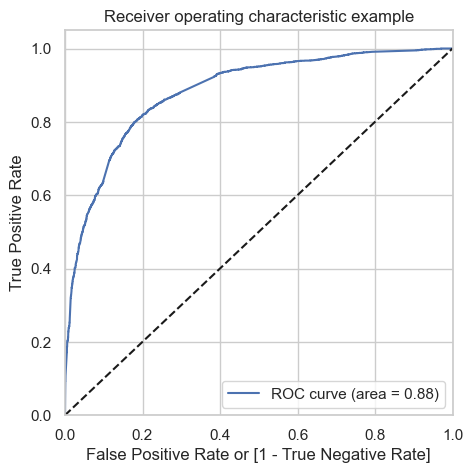

In [88]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probabilty)

The area under the ROC curve is 0.88 which is a good value. Let's check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [89]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probabilty.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probabilty,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.117472,0,12.0,1,1,0,0,0,0,0,0,0,0
1,0,0.212980,0,21.0,1,1,1,0,0,0,0,0,0,0
2,1,0.968965,1,97.0,1,1,1,1,1,1,1,1,1,1
3,0,0.055819,0,6.0,1,0,0,0,0,0,0,0,0,0
4,0,0.241388,0,24.0,1,1,1,0,0,0,0,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

Temp_df = pd.DataFrame(columns = ['Prob','Accu','Sensi','Speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    CM1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    Total_1=sum(sum(CM1))
    
    Accu = (CM1[0,0]+CM1[1,1])/Total_1    
    Speci = CM1[0,0]/(CM1[0,0]+CM1[0,1])
    Sensi = CM1[1,1]/(CM1[1,0]+CM1[1,1])
    Temp_df.loc[i] =[i ,Accu,Sensi,Speci]
    
print(Temp_df)

     Prob      Accu     Sensi     Speci
0.0   0.0  0.379389  1.000000  0.000000
0.1   0.1  0.610208  0.966153  0.392614
0.2   0.2  0.730169  0.925450  0.610791
0.3   0.3  0.801203  0.835904  0.779990
0.4   0.4  0.813231  0.771637  0.838659
0.5   0.5  0.814694  0.705656  0.881351
0.6   0.6  0.796001  0.581834  0.926925
0.7   0.7  0.786086  0.514139  0.952331
0.8   0.8  0.763166  0.426735  0.968832
0.9   0.9  0.707900  0.248929  0.988476


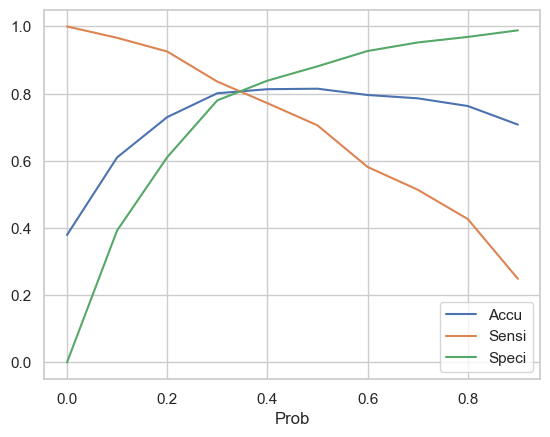

In [91]:
# Let's plot the trade-off

Temp_df.plot.line(x='Prob', y=['Accu','Sensi','Speci'])
plt.show()

**Based on the above plot, the cut-off point comes around 0.35 & let's choose the same as the optimum treshold value.**

In [92]:
# Update new column 'Final_Predicted' based on the new threshold value. 

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Probabilty.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probabilty,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.117472,0,12.0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.212980,0,21.0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.968965,1,97.0,1,1,1,1,1,1,1,1,1,1,1
3,0,0.055819,0,6.0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.241388,0,24.0,1,1,1,0,0,0,0,0,0,0,0


In [93]:
# Let's check the new accuracy 

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8098179453836151

In [94]:
# Let's create the confusion matrix once again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
print(confusion)

[[3095  723]
 [ 447 1887]]


In [95]:
# Evaluating the other metrices

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Calculating sensitivity of the model / Recall

Senstivity = TP /(TP+FN)
Senstivity

0.8084832904884319

In [97]:
# Calculating sensitivity of the model

specificity = TN /(TN+FP)
specificity

0.8106338397066527

In [98]:
# Calculating the false postive rate 

FPR = FP/(TN+FP)
FPR

0.1893661602933473

In [99]:
# Calculating the Positive predictive value / Precision

PPV = TP /(TP+FP)
PPV

0.7229885057471265

In [100]:
# Calculating the Negative predictive value

NPV = TN /(TN+ FN)
NPV

0.8738001129305477

#### <font color='blue'> Making Predictions on the Test Set </font>

In [101]:
# Scaling the test data using 'transform'

num_vars = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [102]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_Qatar,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable,Do Not Email
7625,0.133333,0.713468,0,0,0,0,0,0,0,0,0,1,0,0,0
3756,0.200000,0.121919,0,0,0,0,0,0,1,0,0,1,0,0,0
4680,0.000000,0.000000,1,0,0,1,0,0,1,0,0,1,0,0,0
2907,0.600000,0.714349,0,0,0,0,0,0,1,0,0,1,0,0,0
7651,0.133333,0.469630,0,0,1,0,0,0,0,0,0,1,0,0,0


In [103]:
# Adding constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_Qatar,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable,Do Not Email
7625,1.0,0.133333,0.713468,0,0,0,0,0,0,0,0,0,1,0,0,0
3756,1.0,0.200000,0.121919,0,0,0,0,0,0,1,0,0,1,0,0,0
4680,1.0,0.000000,0.000000,1,0,0,1,0,0,1,0,0,1,0,0,0
2907,1.0,0.600000,0.714349,0,0,0,0,0,0,1,0,0,1,0,0,0
7651,1.0,0.133333,0.469630,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8099,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0
434,1.0,0.200000,0.274208,0,0,0,0,0,0,0,0,0,1,0,0,0
9184,1.0,0.333333,0.031690,0,0,0,0,0,0,0,0,0,0,1,0,0
5684,1.0,0.000000,0.000000,0,0,1,0,0,1,0,0,0,1,0,0,0


In [104]:
# Drop the required columns from X_test as well

X_test.drop(['Country_Qatar', 'What is your current occupation_Housewife', 'What is your current occupation_Unemployed', 'Lead Source_Welingak Website'], axis = 1,inplace = True)

In [105]:
# Make predictions on the test data and store it in the variable 'y_test_pred'

y_test_pred = lm5.predict(sm.add_constant(X_test))
y_test_pred[:10]

7625    0.655112
3756    0.339531
4680    0.968965
2907    0.937559
7651    0.749393
6105    0.057148
7489    0.942442
6168    0.212107
6881    0.039497
1353    0.069200
dtype: float64

In [106]:
# Converting y_pred to a dataframe

y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
7625,0.655112
3756,0.339531
4680,0.968965
2907,0.937559
7651,0.749393


In [107]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [108]:
# Creating 'y_pred_final'

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [109]:
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.655112
1,0,0.339531
2,1,0.968965
3,1,0.937559
4,0,0.749393


In [110]:
# Changing the column name

y_pred_final = y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,0,0.655112
1,0,0.339531
2,1,0.968965
3,1,0.937559
4,0,0.749393


In [111]:
# Make predictions on the test set with 0.35 as the Threshold value

y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Probability,Final_Predicted
0,0,0.655112,1
1,0,0.339531,0
2,1,0.968965,1
3,1,0.937559,1
4,0,0.749393,1


In [112]:
# Updating the lead score 

y_pred_final['Lead Score'] = y_pred_final.Conversion_Probability.map(lambda x: round(x*100,0))
y_pred_final.head()

,Converted,Conversion_Probability,Final_Predicted,Lead Score
0,0,0.655112,1,66.0
1,0,0.339531,0,34.0
2,1,0.968965,1,97.0
3,1,0.937559,1,94.0
4,0,0.749393,1,75.0


In [113]:
# Checking the accuracy of the test data

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Final_Predicted)

0.7868790291998483

In [114]:
# Creating the confusion matrix

confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Final_Predicted )
confusion_test

array([[1312,  324],
       [ 238,  763]], dtype=int64)

In [115]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [116]:
# Calculating the sensitivity

TP /(TP+FN)

0.7622377622377622

In [117]:
# Calculating the specificity

TN /(TN+FP)

0.8019559902200489

#### <font color='blue'> Precision and recall tradeoff </font>

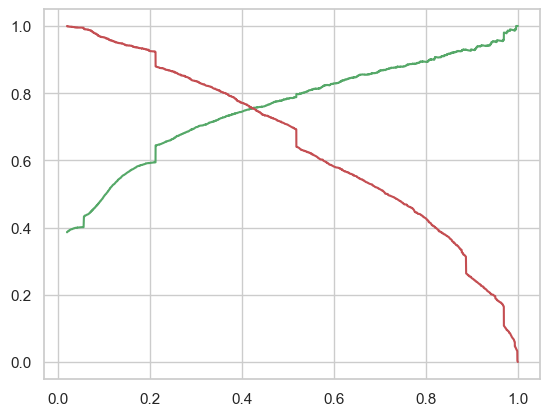

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probabilty)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**As we can see from the above graph, the cut-off point is 0.42.**

In [119]:
# Make the final predicted column using the above threshold

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Probabilty.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probabilty,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.117472,0,12.0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.212980,0,21.0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.968965,1,97.0,1,1,1,1,1,1,1,1,1,1,1
3,0,0.055819,0,6.0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.241388,0,24.0,1,1,1,0,0,0,0,0,0,0,0


In [120]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8143693107932379

In [121]:
# Let's create the confusion matrix once again

confusion_new = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion_new

array([[3242,  576],
       [ 566, 1768]], dtype=int64)

In [122]:
# Let's evaluate the other metrics as well

TP = confusion_new[1,1] # true positive 
TN = confusion_new[0,0] # true negatives
FP = confusion_new[0,1] # false positives
FN = confusion_new[1,0] # false negatives

In [123]:
# Calculating the Precision

TP/(TP+FP)

0.7542662116040956

In [124]:
# Calculating the Recall

TP/(TP+FN)

0.7574978577549272

#### <font color='blue'> Making Predictions on the Test Set </font>

In [125]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = lm5.predict(sm.add_constant(X_test))
y_test_pred[:10]

7625    0.655112
3756    0.339531
4680    0.968965
2907    0.937559
7651    0.749393
6105    0.057148
7489    0.942442
6168    0.212107
6881    0.039497
1353    0.069200
dtype: float64

In [126]:
# Converting y_pred to a dataframe

y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
7625,0.655112
3756,0.339531
4680,0.968965
2907,0.937559
7651,0.749393


In [127]:
# Creating 'y_pred_final'

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.655112
1,0,0.339531
2,1,0.968965
3,1,0.937559
4,0,0.749393


In [129]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,0,0.655112
1,0,0.339531
2,1,0.968965
3,1,0.937559
4,0,0.749393


In [130]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Probability,Final_Predicted
0,0,0.655112,1
1,0,0.339531,0
2,1,0.968965,1
3,1,0.937559,1
4,0,0.749393,1


In [137]:
# Updating the lead score 

y_pred_final['Lead Score'] = y_pred_final.Conversion_Probability.map(lambda x: round(x*100,0))
y_pred_final.head()

,Converted,Conversion_Probability,Final_Predicted,Lead Score
0,0,0.655112,1,66.0
1,0,0.339531,0,34.0
2,1,0.968965,1,97.0
3,1,0.937559,1,94.0
4,0,0.749393,1,75.0


In [131]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Final_Predicted)

0.7974971558589306

In [132]:
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Final_Predicted )
confusion_test

array([[1386,  250],
       [ 284,  717]], dtype=int64)

In [133]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [134]:
# Calculating the Precision

TP/(TP+FP)

0.7414684591520165

In [135]:
# Calculating the Recall

TP/(TP+FN)

0.7162837162837162

### <font color='red'> Conclusion </font>

Significant variables to predict the potential leads are :


In [136]:
lm5.params

const                                                  -2.915433
TotalVisits                                             1.454840
Total Time Spent on Website                             4.713648
Lead Origin_Lead Add Form                               4.972153
Lead Origin_Lead Import                                 1.834902
Lead Source_Olark Chat                                  1.603159
Last Activity_Had a Phone Conversation                  2.070172
Last Activity_Olark Chat Conversation                  -1.515929
Last Activity_SMS Sent                                  1.384397
What is your current occupation_Working Professional    2.879075
Last Notable Activity_Unreachable                       2.158080
Do Not Email                                           -1.474431
dtype: float64